<a href="https://colab.research.google.com/github/armandordorica/Portfolio_Optimization/blob/master/etf_rotational_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=eac5b6243d63ab221be4dc83c6998adba9c2ada0380aefb45df6f3ed057b4fe9
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
pwd

'/content'

In [48]:
from datetime import datetime, timedelta
from pandas_datareader import data as pdr

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


class Stock: 
  def __init__(self, stock_name, start_dt, end_dt):
    yf.pdr_override() # <== that's all it takes :-)

    self.stock_name = stock_name 
    self.start_dt = start_dt
    self.end_dt = end_dt 
    print("Name:{}, start_dt:{}, end_dt:{}".format(self.stock_name, self.start_dt, self.end_dt))
    self.data = pdr.get_data_yahoo(self.stock_name, start=self.start_dt, end=self.end_dt)

    self.ticker = yf.Ticker(self.stock_name)

    try: 
      self.beta = self.ticker.info['beta']
    except: 
      self.beta = 'N/A'

    self.timeseries = self.data['Close']
    self.dates = self.timeseries.index.to_frame()
    # self.one_year_return = self.get_annual_return(1)
    # self.two_year_return = self.get_annual_return(2)
    # self.five_year_return = self.get_annual_return(5)

  def get_annual_return(self, num_years):
    period = 365 *num_years
    print("Period:{}".format(period))
    end = max(self.timeseries.index)
    print("end:{}".format(end))
  
    start = end - timedelta(days=period)
    try: 
      start = self.dates[self.dates['Date']<=start].iloc[-1].Date
      print("start:{}".format(start))

      ending_balance = self.timeseries.loc[end]
      beginning_balance = self.timeseries.loc[start]  

      return ((ending_balance - beginning_balance)/beginning_balance)/(period//365)

    except:
      print("\n Start date:{} is not available!".format(start))

  def get_monthly_return(self, num_months):
    period = 30 *num_months
    print("Period:{}".format(period))
    end = max(self.timeseries.index)
    print("end:{}".format(end))
  
    start = end - timedelta(days=period)
    try: 
      start = self.dates[self.dates['Date']<=start].iloc[-1].Date
      print("start:{}".format(start))

      ending_balance = self.timeseries.loc[end]
      beginning_balance = self.timeseries.loc[start]  

      return ((ending_balance - beginning_balance)/beginning_balance)/(period//30)

    except:
      print("\n Start date:{} is not available!".format(start))

  
  def get_monthly_std(self, num_months): 
    period = 30*num_months
    print("Period:{}".format(period))
    end = max(self.timeseries.index)
    print("end:{}".format(end))
  
    start = end - timedelta(days=period)
    try: 

      std_dev = self.data.loc[start:end]['Close'].std()

      print("start:{}".format(start))

      return std_dev

    except:
      print("\n Start date:{} is not available!".format(start))

  
  
  def plot(self):
    self.timeseries.plot()
    plt.title(self.stock_name)

In [49]:
 ticker = yf.Ticker('XLP')

### **Input your list of Stocks or ETFs here**

In [50]:
sector_etfs = ['IGV', 
               'IYJ',
               'SMH', 
               'PBS', 
               'KBE', 'IYW', 'KIE', 'ITA', 'IHI', 'ITB', 'IYT', 'XLB', 'IYZ', 'KCE', 'XLP', 'VNQ', 'IHE', 'PBJ', 'IBB', 'IEZ', 'XLU', 'XOP', 
               'XRT',
               'IHF']

In [79]:

three_mth_returns = []
three_mth_stddevs = []

for etf in sector_etfs: 
  etf_yahoo = None
  while etf_yahoo is None:
    try:
        # connect
        print(etf)
        etf_yahoo = Stock(etf, '2020-04-01', '2020-07-01')
        three_mth_returns.append(etf_yahoo.get_monthly_return(3))
        three_mth_stddevs.append(etf_yahoo.get_monthly_std(3))
    except:
         pass

IGV
Name:IGV, start_dt:2020-04-01, end_dt:2020-07-01
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
IYJ
Name:IYJ, start_dt:2020-04-01, end_dt:2020-07-01
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
SMH
Name:SMH, start_dt:2020-04-01, end_dt:2020-07-01
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
PBS
Name:PBS, start_dt:2020-04-01, end_dt:2020-07-01
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
KBE
Name:KBE, start_dt:2020-04-0

In [80]:

one_mth_returns = []
one_mth_stddevs = []

for etf in sector_etfs: 
  etf_yahoo = None
  while etf_yahoo is None:
    try:
        # connect
        print(etf)
        etf_yahoo = Stock(etf, '2020-04-01', '2020-07-01')
        one_mth_returns.append(etf_yahoo.get_monthly_return(1))
        one_mth_stddevs.append(etf_yahoo.get_monthly_std(1))
    except:
         pass


IGV
Name:IGV, start_dt:2020-04-01, end_dt:2020-07-01
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-06-30 00:00:00
start:2020-05-29 00:00:00
Period:30
end:2020-06-30 00:00:00
start:2020-05-31 00:00:00
IYJ
Name:IYJ, start_dt:2020-04-01, end_dt:2020-07-01
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-06-30 00:00:00
start:2020-05-29 00:00:00
Period:30
end:2020-06-30 00:00:00
start:2020-05-31 00:00:00
SMH
Name:SMH, start_dt:2020-04-01, end_dt:2020-07-01
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-06-30 00:00:00
start:2020-05-29 00:00:00
Period:30
end:2020-06-30 00:00:00
start:2020-05-31 00:00:00
PBS
Name:PBS, start_dt:2020-04-01, end_dt:2020-07-01
[*********************100%***********************]  1 of 1 completed
Period:30
end:2020-06-30 00:00:00
start:2020-05-29 00:00:00
Period:30
end:2020-06-30 00:00:00
start:2020-05-31 00:00:00
KBE
Name:KBE, start_dt:2020-04-0

In [81]:

d = {'sector_etfs': sector_etfs, 'three_mth_returns': three_mth_returns, 'three_mth_stddevs':three_mth_stddevs, 'one_mth_returns':one_mth_returns, 'one_mth_stddevs':one_mth_stddevs}
etfs_df = pd.DataFrame(data=d)
etfs_df

,sector_etfs,three_mth_returns,three_mth_stddevs,one_mth_returns,one_mth_stddevs
0,IGV,0.139683,23.194377,0.063531,6.484668
1,IYJ,0.092035,10.720990,0.019400,4.658839
2,SMH,0.124165,10.811516,0.083457,3.422814
3,PBS,0.145428,3.046055,0.059745,0.789043
4,KBE,0.084526,2.947731,0.002862,2.076106
5,IYW,0.128053,19.749924,0.070932,5.503687
6,KIE,0.054610,1.700605,0.010717,1.233432
7,ITA,0.069002,13.110297,0.001033,9.042270
8,IHI,0.080978,11.831293,-0.013929,5.191899
9,ITB,0.220341,5.887190,0.020809,1.304103


In [82]:
etfs_df['three_mth_return_score']=etfs_df['three_mth_returns'].rank().astype(int)
etfs_df['one_mth_return_score']=etfs_df['one_mth_returns'].rank().astype(int)

In [83]:
etfs_df['three_mth_volatility_score']=etfs_df['three_mth_stddevs'].rank(ascending=False).astype(int)
etfs_df['one_mth_volatility_score']=etfs_df['one_mth_stddevs'].rank(ascending=False).astype(int)

In [84]:
etfs_df['global_score'] = etfs_df['three_mth_return_score'] + etfs_df['three_mth_volatility_score'] +etfs_df['one_mth_return_score'] + etfs_df['one_mth_volatility_score']
etfs_df

,sector_etfs,three_mth_returns,three_mth_stddevs,one_mth_returns,one_mth_stddevs,three_mth_return_score,one_mth_return_score,three_mth_volatility_score,one_mth_volatility_score,global_score
0,IGV,0.139683,23.194377,0.063531,6.484668,19,22,1,2,44
1,IYJ,0.092035,10.720990,0.019400,4.658839,13,16,7,8,44
2,SMH,0.124165,10.811516,0.083457,3.422814,17,24,6,9,56
3,PBS,0.145428,3.046055,0.059745,0.789043,20,21,17,23,81
4,KBE,0.084526,2.947731,0.002862,2.076106,12,10,18,14,54
5,IYW,0.128053,19.749924,0.070932,5.503687,18,23,2,5,48
6,KIE,0.054610,1.700605,0.010717,1.233432,5,12,20,18,55
7,ITA,0.069002,13.110297,0.001033,9.042270,8,9,3,1,21
8,IHI,0.080978,11.831293,-0.013929,5.191899,11,6,4,7,28
9,ITB,0.220341,5.887190,0.020809,1.304103,23,18,12,17,70


In [85]:
etfs_df.sort_values(by='global_score', ascending=False)

,sector_etfs,three_mth_returns,three_mth_stddevs,one_mth_returns,one_mth_stddevs,three_mth_return_score,one_mth_return_score,three_mth_volatility_score,one_mth_volatility_score,global_score
3,PBS,0.145428,3.046055,0.059745,0.789043,20,21,17,23,81
22,XRT,0.176597,4.479257,0.050980,1.132164,21,20,14,19,74
19,IEZ,0.184717,1.274973,-0.003472,0.927710,22,8,22,21,73
9,ITB,0.220341,5.887190,0.020809,1.304103,23,18,12,17,70
13,KCE,0.096540,4.038739,0.021466,1.660311,14,19,15,16,64
11,XLB,0.103387,3.931022,0.016231,1.693912,15,15,16,15,61
17,PBJ,0.048966,0.970846,-0.014516,0.542395,4,5,24,24,57
2,SMH,0.124165,10.811516,0.083457,3.422814,17,24,6,9,56
6,KIE,0.054610,1.700605,0.010717,1.233432,5,12,20,18,55
4,KBE,0.084526,2.947731,0.002862,2.076106,12,10,18,14,54


Text(0.5, 1.0, 'Sector ETFS distribution of risk and variance')

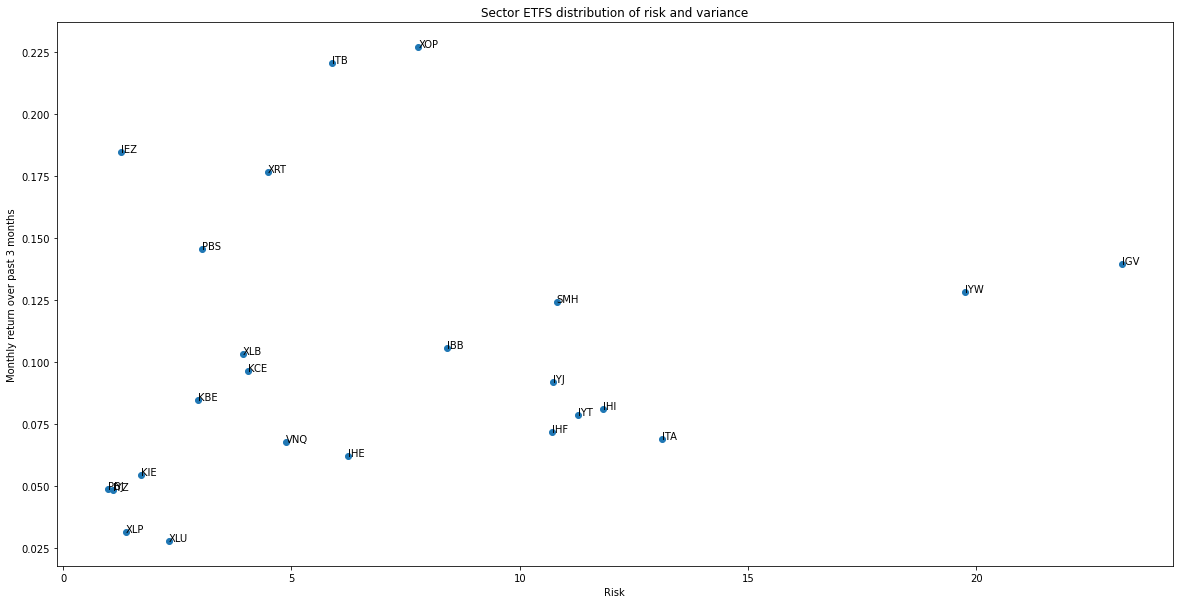

In [86]:
x = df['three_mth_stddevs']
y = df['three_mth_returns']
n = df['sector_etfs']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Monthly return over past 3 months')
ax.set_xlabel('Risk')
ax.set_title("Sector ETFS distribution of risk and variance")


### IGV - iShares S&P Software Industry Index

In [ ]:
IGV = Stock ('IGV', '2012-01-01', '2020-07-01')

In [ ]:
IGV.get_monthly_std(3)

In [ ]:
three_mth_return = IGV.get_monthly_return(3)
three_mth_return

In [17]:
three_mth_return

0.1396834963547813

### Stocks Risk Return Analysis

In [17]:
stocks =['AAPL',
         'ADBE', 
 'AC',
 'AMD',
 'AMZN',
 'AXP',
 'BABA',
 'COST',
 'DAL',
 'DIA',
 'FB',
 'GOOGL',
 'HD',
 'INTC',
 'INTU',
 'IVR',
 'L',
 'LULU',
 'LMT',
 'MA',
 'MELI',
 'MRNA',
 'MSFT',
 'NFLX',
 'NVDA',
 'PYPL',
 #'QQQ',
 'QTEC',
 'RY',
 'SHOP',
 'SNE',
 'SPCE',
 'SPY',
 'SQ',
 'UBER',
 'V',
 'ZM']

In [18]:
three_mth_returns = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2020-01-01', '2020-07-01')
  three_mth_returns.append(stock_yahoo.get_monthly_return(3))

three_mth_stddevs = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2020-01-01', '2020-07-01')
  three_mth_stddevs.append(stock_yahoo.get_monthly_std(3))

d = {'stocks': stocks, 'Monthly returns over past 3 months': three_mth_returns, 'three_mth_stddevs':three_mth_stddevs}
stocks_df = pd.DataFrame(data=d)
stocks_df

AAPL
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
ADBE
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AC
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AMD
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AMZN
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
AXP
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
BABA
[*********************100%***********************]  1 of 1 completed
Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00
COST
[*********************100%***********************]  1 of 1 co

,stocks,Monthly returns over past 3 months,three_mth_stddevs
0,AAPL,0.171419,33.301355
1,ADBE,0.148401,37.838701
2,AC,0.133817,3.087816
3,AMD,0.068331,3.079535
4,AMZN,0.148717,206.570801
5,AXP,0.074341,9.150166
6,BABA,0.050011,10.586962
7,COST,0.019097,5.950383
8,DAL,0.058372,3.959533
9,DIA,0.077196,14.296369


Text(0.5, 1.0, 'Distribution of stocks by risk and variance')

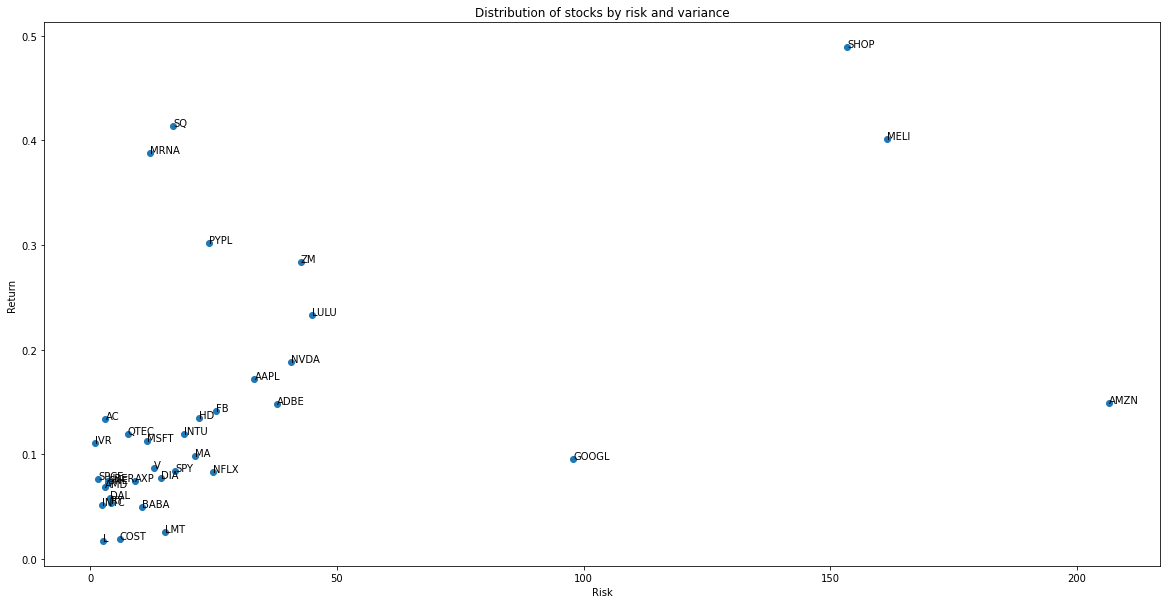

In [19]:
x = stocks_df['three_mth_stddevs']
y = stocks_df['Monthly returns over past 3 months']
n = stocks_df['stocks']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Return')
ax.set_xlabel('Risk')
ax.set_title("Distribution of stocks by risk and variance")


### One year returns

In [32]:
one_year_returns = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2019-07-01', '2020-07-01')
  one_year_returns.append(stock_yahoo.get_monthly_return(12))

AAPL
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-05 00:00:00
AC
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-05 00:00:00
AMD
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-05 00:00:00
AMZN
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-05 00:00:00
COST
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-05 00:00:00
DAL
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-05 00:00:00
DIA
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-05 00:00:00
FB
[*********************100%***********************]  1 of 

In [35]:
one_year_stddevs = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2019-07-01', '2020-07-01')
  one_year_stddevs.append(stock_yahoo.get_monthly_std(12))

AAPL
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-06 00:00:00
AC
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-06 00:00:00
AMD
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-06 00:00:00
AMZN
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-06 00:00:00
COST
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-06 00:00:00
DAL
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-06 00:00:00
DIA
[*********************100%***********************]  1 of 1 completed
Period:360
end:2020-06-30 00:00:00
start:2019-07-06 00:00:00
FB
[*********************100%***********************]  1 of 

In [36]:
d = {'stocks': stocks, 'One year returns': one_year_returns, 'One year stddevs':one_year_stddevs}
stocks_df = pd.DataFrame(data=d)
stocks_df

,stocks,One year returns,One year stddevs
0,AAPL,0.065518,45.506649
1,AC,-0.005475,4.181041
2,AMD,0.055847,9.461792
3,AMZN,0.034995,282.884016
4,COST,0.010861,11.922662
5,DAL,-0.043512,14.882189
6,DIA,-0.003528,21.651441
7,FB,0.013013,20.054940
8,GOOGL,0.020996,114.298969
9,HD,0.015389,18.189342


Text(0.5, 1.0, 'Distribution of stocks by risk and variance')

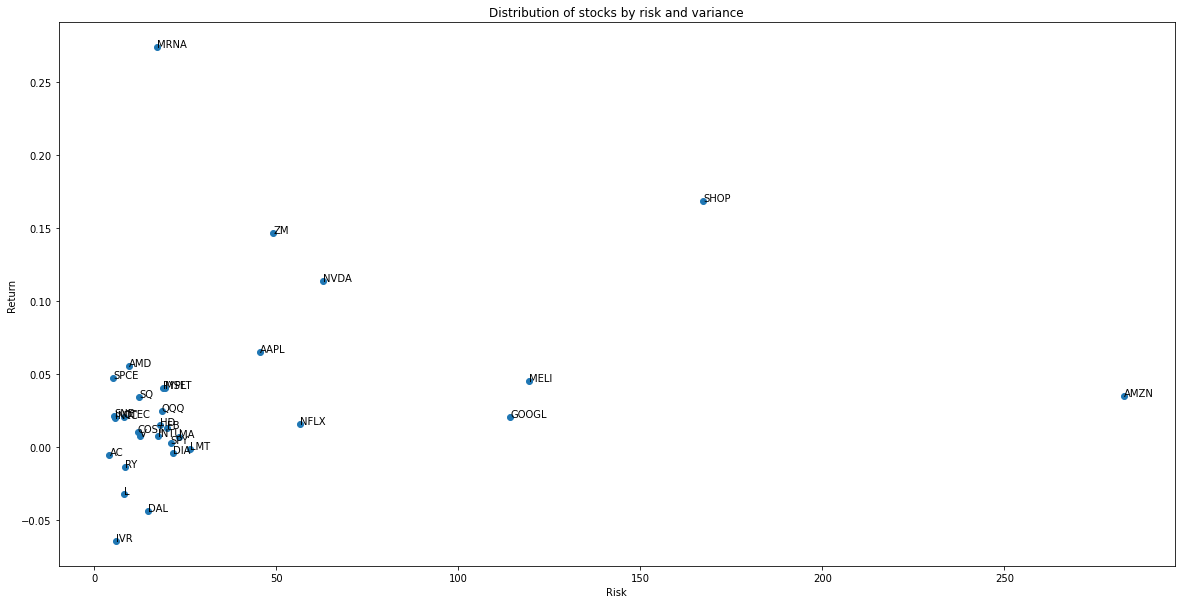

In [37]:
x = stocks_df['One year stddevs']
y = stocks_df['One year returns']
n = stocks_df['stocks']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Return')
ax.set_xlabel('Risk')
ax.set_title("Distribution of stocks by risk and variance")


### Three-year returns 

AAPL
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-06-30 00:00:00
start:2017-07-14 00:00:00
AC
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-06-30 00:00:00
start:2017-07-14 00:00:00
AMD
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-06-30 00:00:00
start:2017-07-14 00:00:00
AMZN
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-06-30 00:00:00
start:2017-07-14 00:00:00
COST
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-06-30 00:00:00
start:2017-07-14 00:00:00
DAL
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-06-30 00:00:00
start:2017-07-14 00:00:00
DIA
[*********************100%***********************]  1 of 1 completed
Period:1080
end:2020-06-30 00:00:00
start:2017-07-14 00:00:00
FB
[*********************100%***********************]

Text(0.5, 1.0, 'Distribution of stocks by risk and variance')

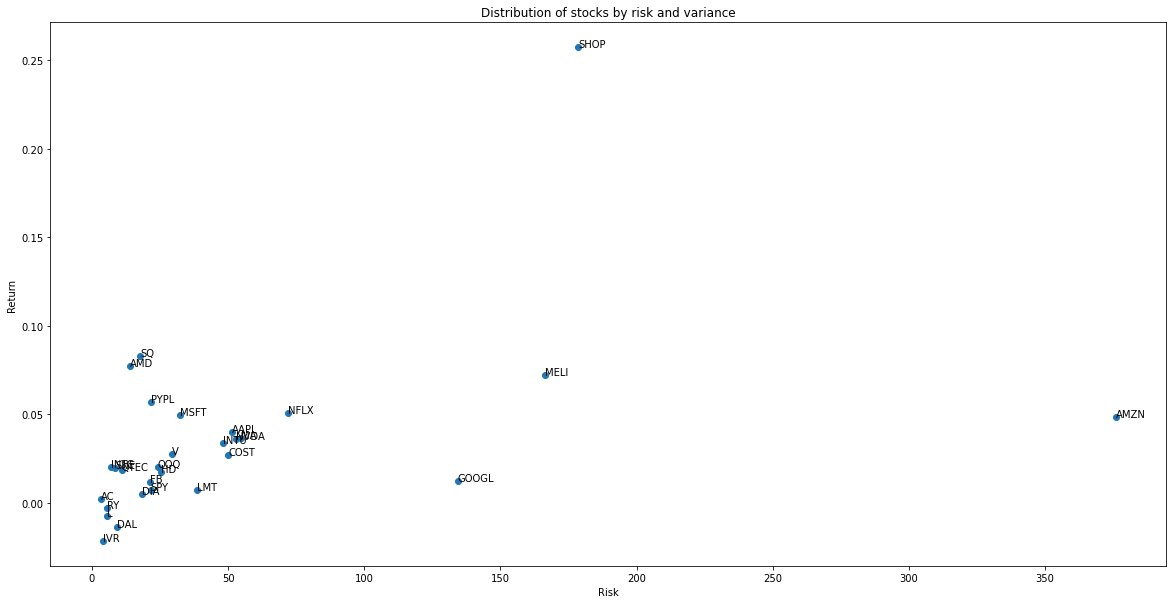

In [39]:
three_year_returns = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2017-05-01', '2020-07-01')
  three_year_returns.append(stock_yahoo.get_monthly_return(36))

three_year_stddevs = []
for stock in stocks: 
  print(stock)
  stock_yahoo = Stock(stock, '2017-05-01', '2020-07-01')
  three_year_stddevs.append(stock_yahoo.get_monthly_std(36))

d = {'stocks': stocks, 'three_year_returns': three_year_returns, 'three_year_stddevs':three_year_stddevs}
stocks_3y_df = pd.DataFrame(data=d)
stocks_3y_df

x = stocks_3y_df['three_year_stddevs']
y = stocks_3y_df['three_year_returns']
n = stocks_3y_df['stocks']

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('Return')
ax.set_xlabel('Risk')
ax.set_title("Distribution of stocks by risk and variance")


### Market Vectors Semiconductor ETF

In [26]:
AMZN = Stock ('AMZN', '2012-01-01', '2020-07-01')

[*********************100%***********************]  1 of 1 completed


In [27]:
AMZN.get_monthly_return(3)

Period:90
end:2020-06-30 00:00:00
start:2020-04-01 00:00:00


0.1487166289200193

In [28]:
SMH = Stock ('SMH', '2012-01-01', '2020-07-01')

[*********************100%***********************]  1 of 1 completed


### iShares DJ U.S. Technology sector

In [31]:
IYW = Stock ('IYW', '2012-01-01', '2020-07-01')

[*********************100%***********************]  1 of 1 completed
